<a href="https://colab.research.google.com/github/DeekshaaGatty/ProfitPrediction/blob/main/StartupsProfitPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__ProfitPredictor: Exploring Regression Algorithms__

##_Objective:_
 To identify the most suitable regression algorithm for optimizing profit forecasting accuracy based on R&D spend, Administration cost, and Marketing spend

##_Dataset:_
`50_Startups` which contains information on various startups, including their spending on research, administration, and marketing, aimed at predicting their respective profits through regression analysis.

The columns in the "50_Startups.csv" dataset typically include:


1. R&D Spend: The amount of money spent on research and development by each startup.
2. Administration cost: Expenditures on administrative functions for each startup.
3. Marketing Spend: Funds allocated to marketing and promotional activities.
4. Profit: The net profit generated by each startup.


##_Importing necessary libraries_


In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Different regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error

##_Loading the dataset_

In [3]:
data = pd.read_csv("50_Startups.csv")

##_Describing data_

In [4]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

##_Visualizing the data_

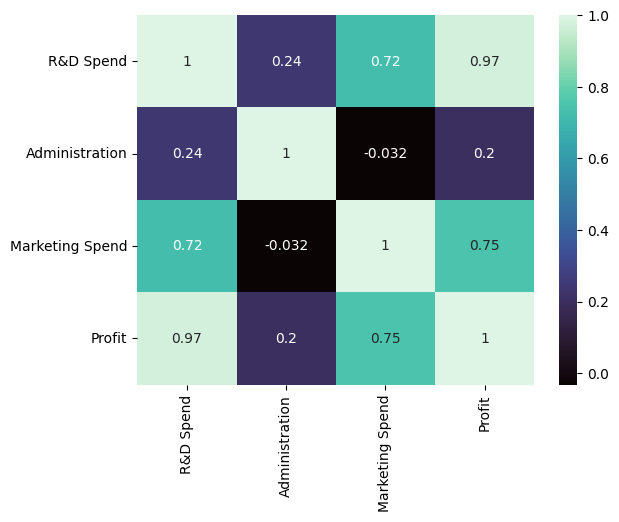

In [9]:
# Visualizing correlation using heatmap
c = data.corr()
sns.heatmap(c,annot=True,cmap='mako')
plt.show()

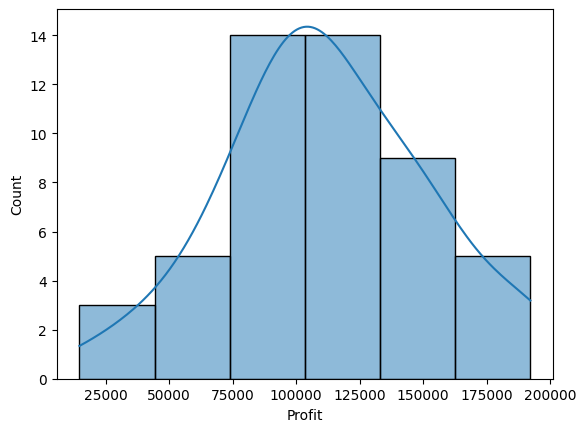

In [10]:
# Showing distribution of profit values
sns.histplot(data['Profit'],bins=6,kde=True)
plt.show()

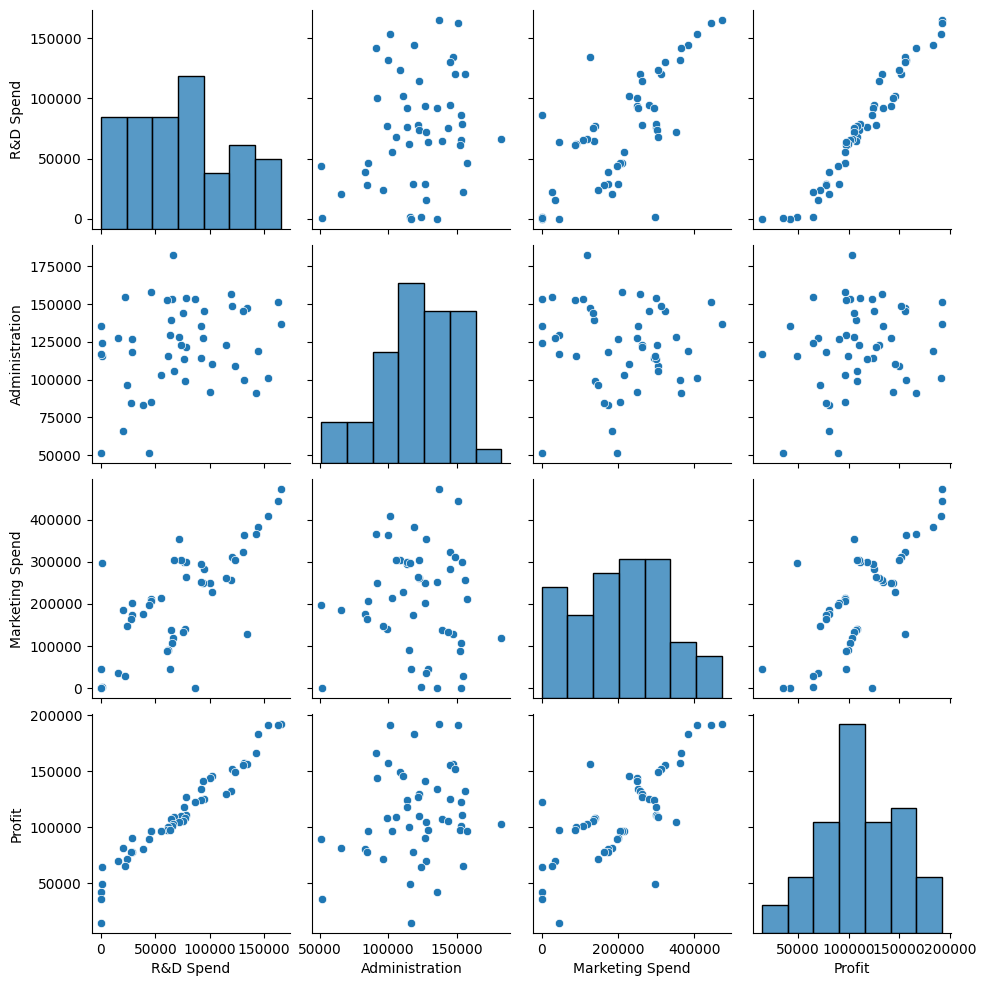

In [11]:
# Visualizing pairwise relationships between numerical features using scatter plots and histograms
sns.pairplot(data)
plt.show()

##_Preprocessing the data_

In [12]:
# Splitting the dataset into dependent (y) & independent (X) variables
X = data.drop('Profit', axis=1)
y = data['Profit']

In [13]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Checking shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 3), (15, 3), (35,), (15,))

In [15]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##_Training the model using different regression algorithms & Evaluating the performance_

In [16]:
## Creating the dictionary of regression models
# Key: Model Name, Value: Initialized Model Object
models = {
    'Linear Regression': LinearRegression(),  # Basic linear regression model
    'Decision Tree': DecisionTreeRegressor(random_state=42),  # Decision tree regression model
    'Elastic Net Regression': ElasticNet(alpha=1, l1_ratio=0.5), # Elastic net regression model
    'Random Forest': RandomForestRegressor(random_state=42),  # Random forest regression model
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)  # K nearest neighbors regression model
}

In [17]:
# Training and evaluating each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test,y_pred)

    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2, 'MAPE': mape }

In [18]:
# Printing regression metrics
for name, metrics in results.items():
    print(f'{name}:\n')
    print(f'Mean Squared Error (MSE): {metrics["MSE"]}')
    print(f'Root Mean Squared Error (RMSE): {metrics["RMSE"]}')
    print(f'Mean Absolute Error (MAE): {metrics["MAE"]}')
    print(f'R-squared: {metrics["R-squared"]}')
    print(f'Mean Absolute Percentage Error (MAPE): {metrics["MAPE"]}\n')
    print('-' * 60,"\n")

Linear Regression:

Mean Squared Error (MSE): 81772149.43547156
Root Mean Squared Error (RMSE): 9042.795443637524
Mean Absolute Error (MAE): 7222.594346965519
R-squared: 0.9418819530700164
Mean Absolute Percentage Error (MAPE): 0.08854223842593464

------------------------------------------------------------ 

Decision Tree:

Mean Squared Error (MSE): 296967508.74879336
Root Mean Squared Error (RMSE): 17232.745247022987
Mean Absolute Error (MAE): 11872.158000000001
R-squared: 0.7889358207006371
Mean Absolute Percentage Error (MAPE): 0.14926647459821202

------------------------------------------------------------ 

Elastic Net Regression:

Mean Squared Error (MSE): 177246625.31716716
Root Mean Squared Error (RMSE): 13313.40021621701
Mean Absolute Error (MAE): 10922.48314032003
R-squared: 0.874025230356782
Mean Absolute Percentage Error (MAPE): 0.11471776945514825

------------------------------------------------------------ 

Random Forest:

Mean Squared Error (MSE): 101626095.1775344


##_Choosing the best model based on Root Mean Squared Error (RMSE)_

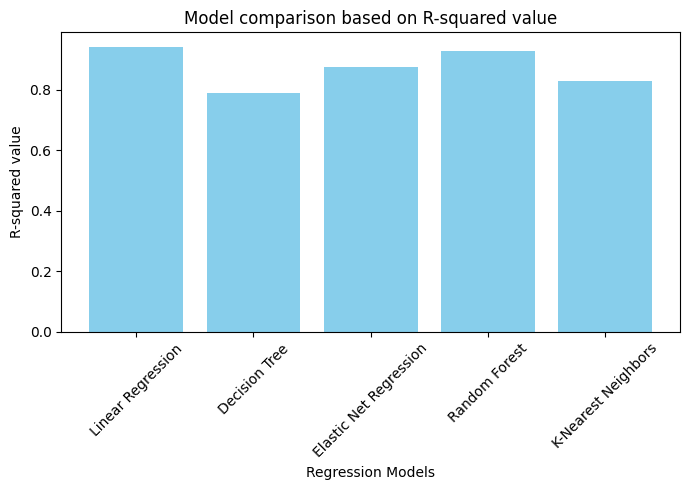

In [19]:
# Model comparison based on R-squared value visualization
model_names = list(results.keys())
rmse_values = [metrics['R-squared'] for metrics in results.values()]

plt.figure(figsize=(7, 5))
plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Regression Models')
plt.ylabel('R-squared value')
plt.title('Model comparison based on R-squared value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f'The best model is \033[1m{best_model}\033[0m')

The best model is Linear Regression


In [21]:
#Comparing the predicted values and actual values for the best model
best_model = models[best_model]
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)
df = pd.DataFrame(data={'Predicted value':best_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
13,125972.148263,134307.35
39,85471.922710,81005.76
30,98924.151683,99937.59
45,46639.786287,64926.08
17,128142.124732,125370.37
48,52602.190537,35673.41
26,108364.697602,105733.54
25,100331.588469,107404.34
32,97538.566747,97427.84
19,112496.703984,122776.86


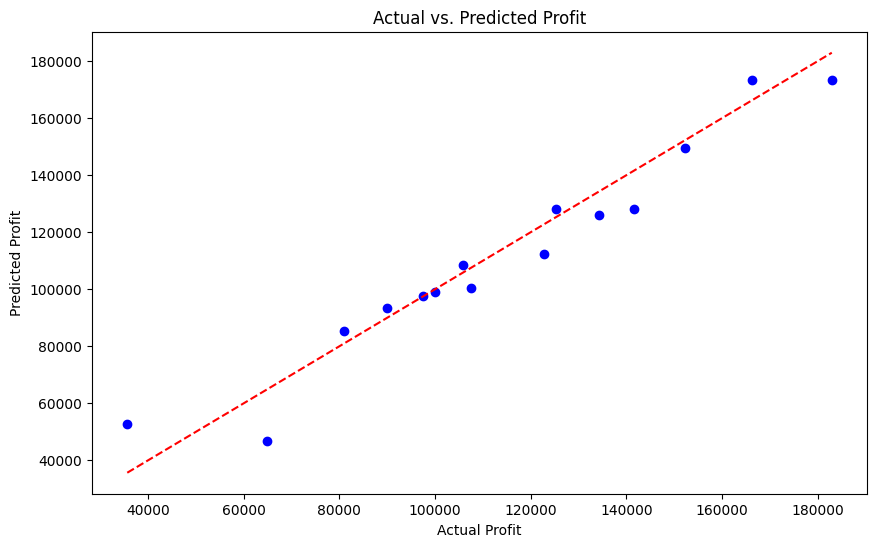

In [22]:
# Visualizing predictions vs. actual values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs. Predicted Profit')
plt.show()

Based on the evaluation of various regression algorithms, the Linear Regression model demonstrates the lowest Root Mean Squared Error (RMSE), making it the most suitable choice for optimizing profit forecasting accuracy based on R&D spend, Administration cost, and Marketing spend.